<a href="https://colab.research.google.com/github/muhammad-ammar1999/GoogleColab/blob/main/DmClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

dataset = pd.read_csv('Seed_Data.csv')
dataset.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
dataset.describe(include = "all")

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


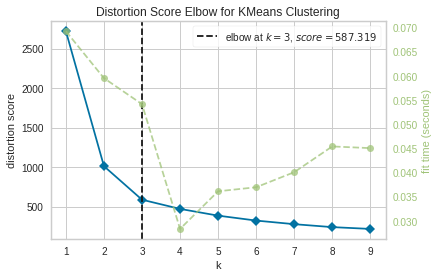

In [4]:
features = dataset.iloc[:, 0:7]
target = dataset.iloc[:, -1]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)    
visualizer.poof()  

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

array([[18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

In [6]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.4719337319126887


In [7]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(target, cluster_labels)
print ('Purity for the above clutering = ', purity)

Purity for the above clutering =  0.8952380952380953


In [8]:
!pip install pyclustering

from pyclustering.cluster.kmedoids import kmedoids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 5.1 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=e49745931f630ee902358525d7771a8bc103bca485957ca5fa428397423aec0d
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [9]:
initial_medoids = [1, 50, 170]
kmedoids_instance = kmedoids(features.values.tolist(), initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
cluster_labels = np.zeros([210], dtype=int)
for x in np.nditer(np.asarray(clusters[1])):
   cluster_labels[x] = 1
for x in np.nditer(np.asarray(clusters[2])):
   cluster_labels[x] = 2
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
kmedoids_instance.get_medoids()

[118, 48, 162]

In [11]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.4719337319126887


In [12]:
purity = purity_score(target, cluster_labels)
print ('Purity for the above clutering = ', purity)

Purity for the above clutering =  0.8952380952380953
